<a href="https://colab.research.google.com/github/Brun0-marinh0/classifacao_de_obsedidade/blob/main/trabalho_de_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload do kaggle.json
from google.colab import files
files.upload()

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv


{'ObesityDataSet_raw_and_data_sinthetic.csv': b'Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad\r\nFemale,21,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight\r\nFemale,21,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight\r\nMale,23,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight\r\nMale,27,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I\r\nMale,22,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II\r\nMale,29,1.62,53.00,no,yes,2.00,3.00,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Automobile,Normal_Weight\r\nFemale,23,1.50,55.00,yes,yes,3.00,3.00,Sometimes,no,2.00,no,1.00,0.000,Sometimes,Motorbike,Normal_Weight\r\nMale,22,1.64,53.00,no,no,2.00,3.0

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Transformar dados em prompts

In [ ]:
def row_to_prompt(row):
    return (
        f"Pessoa do sexo {row['Gender'].lower()}, {row['Age']} anos, altura {row['Height']}m, peso {row['Weight']}kg. "
        f"{'Possui' if row['family_history_with_overweight'] == 'yes' else 'Não possui'} histórico familiar de sobrepeso. "
        f"{'Consome' if row['FAVC'] == 'yes' else 'Não consome'} fast food frequentemente. "
        f"Come {row['NCP']} vezes por dia. "
        f"Consumo de vegetais: {row['FCVC']}. "
        f"{'Fuma' if row['SMOKE'] == 'yes' else 'Não fuma'}. "
        f"Exercita-se {row['FAF']} horas por semana. "
        f"Álcool: {row['CALC']}. Transporte: {row['MTRANS']}. "
        f"Nível de obesidade: {row['NObeyesdad']}."
    )

df['prompt'] = df.apply(row_to_prompt, axis=1)
df[['prompt']].head(3).values[0][0]

'Pessoa do sexo female, 21 anos, altura 1.62m, peso 64.0kg. Possui histórico familiar de sobrepeso. Não consome fast food frequentemente. Come 3.0 vezes por dia. Consumo de vegetais: 2.0. Não fuma. Exercita-se 0.0 horas por semana. Álcool: no. Transporte: Public_Transportation. Nível de obesidade: Normal_Weight.'

#Testando modelo de Regressão Logística

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
X = model.encode(df['prompt'].tolist())
y = df['NObeyesdad']

# Treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Avaliação
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        68
      Normal_Weight       1.00      1.00      1.00        72
     Obesity_Type_I       0.80      0.91      0.85        88
    Obesity_Type_II       0.95      0.72      0.82        74
   Obesity_Type_III       0.93      1.00      0.96        81
 Overweight_Level_I       0.71      0.75      0.73        72
Overweight_Level_II       0.74      0.70      0.72        73

           accuracy                           0.87       528
          macro avg       0.88      0.87      0.87       528
       weighted avg       0.87      0.87      0.87       528



In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np

# Criar o modelo novamente
clf = LogisticRegression(max_iter=1000)

# Avaliar com 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print(f"Acurácias por fold: {scores}")
print(f"Acurácia média: {scores.mean():.4f}")
print(f"Desvio padrão: {scores.std():.4f}")

Acurácias por fold: [0.84160757 0.91232227 0.91232227 0.88625592 0.92654028]
Acurácia média: 0.8958
Desvio padrão: 0.0301


# Testando 3 modelos classificatórios

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import FitFailedWarning
import warnings

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

with warnings.catch_warnings():
    warnings.simplefilter("always", FitFailedWarning)
    for name, model in models.items():
        try:
            scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
            results[name] = scores
            print(f"🔹 {name}")
            print(f"  → Acurácias por fold: {scores}")
            print(f"  → Média: {scores.mean():.4f} | Desvio: {scores.std():.4f}\n")
        except Exception as e:
            print(f"❌ Falha ao rodar {name}: {e}\n")

🔹 Logistic Regression
  → Acurácias por fold: [0.84160757 0.91232227 0.91232227 0.88625592 0.92654028]
  → Média: 0.8958 | Desvio: 0.0301

🔹 Random Forest
  → Acurácias por fold: [0.91725768 0.99052133 0.99526066 0.97630332 0.98341232]
  → Média: 0.9726 | Desvio: 0.0284

🔹 KNN
  → Acurácias por fold: [0.88179669 0.96682464 0.98341232 0.95260664 0.97393365]
  → Média: 0.9517 | Desvio: 0.0364



<ipython-input-20-a74f4a60a251>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results.values(), labels=results.keys())


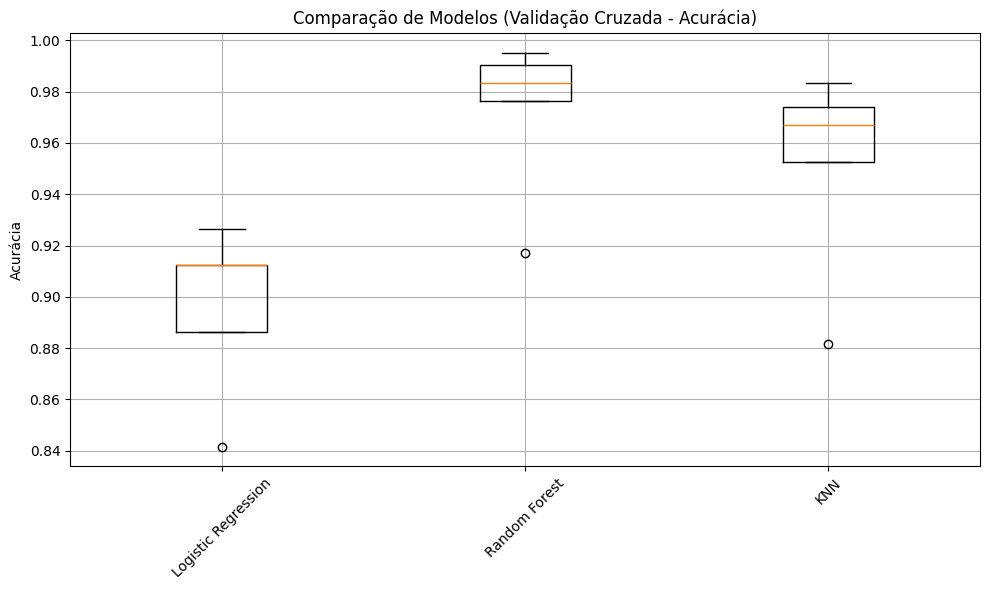

In [ ]:
import matplotlib.pyplot as plt

# Plotar boxplot comparativo
plt.figure(figsize=(10,6))
plt.boxplot(results.values(), labels=results.keys())
plt.title("Comparação de Modelos (Validação Cruzada - Acurácia)")
plt.ylabel("Acurácia")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
